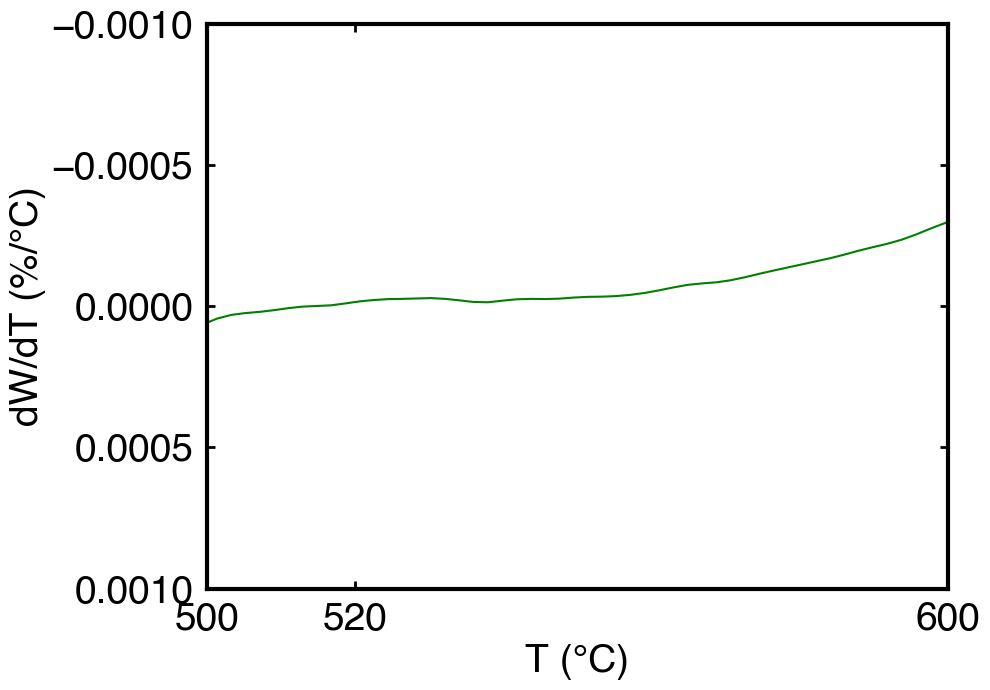

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib as mpl

# === Plot style settings ===
mpl.rcParams['axes.linewidth'] = 3  # Plot border thickness
mpl.rcParams['font.family'] = 'Helvetica'  # Font for all plots

# === Load Excel File ===
file_path = 'TGA_ana_data/Vaterite_Lotus.xlsx'    # Change this to your actual file name

# Load data from both sheets
df_before = pd.read_excel(file_path,sheet_name='Sheet1') 
#df_after = pd.read_excel(file_path, sheet_name='After')

# Clean NaNs and Infs in both 'Before' and 'After' datasets
df_before = df_before.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight'])
#df_after = df_after.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'Deriv. Weight (%/dC)'])

# Group by Temperature and take mean of Deriv. Weight
df_before = df_before.groupby('Temperature', as_index=False)['DerivWeight'].mean()
#df_after = df_after.groupby('Temperature', as_index=False)['Deriv. Weight (%/dC)'].mean()

# Ensure data is sorted (important for interpolation)
df_before = df_before.sort_values('Temperature')
#df_after = df_after.sort_values('Temperature')

# === Extract Temperature and Derivative Weight (%) for both sheets ===
temp_before = df_before['Temperature']
weight_before = df_before['DerivWeight']

#temp_after = df_after['Temperature']
#weight_after = df_after['DerivWeight']

# === Optional: Smooth both curves ===
x_smooth_before = np.linspace(temp_before.min(), temp_before.max(), 500)
spl_before = make_interp_spline(temp_before, weight_before, k=3)
y_smooth_before = spl_before(x_smooth_before)

#x_smooth_after = np.linspace(temp_after.min(), temp_after.max(), 500)
#spl_after = make_interp_spline(temp_after, weight_after, k=3)
#y_smooth_after = spl_after(x_smooth_after)

def second_derivative_5pt(f, dx):
    n = len(f)
    d2f = np.full(n, np.nan)
    for i in range(2, n - 2):
        d2f[i] = (-f[i - 2] + 16 * f[i - 1] - 30 * f[i] + 16 * f[i + 1] - f[i + 2]) / (12 * dx ** 2)
    return d2f

dx = np.mean(np.diff(x_smooth_before))    
SD=second_derivative_5pt(y_smooth_before, dx)

second_derivative_tan = np.gradient(y_smooth_before, x_smooth_before)

# === Plotting ===
fig, ax = plt.subplots(figsize=(10, 7))  # Adjust figure size

# Plot both smoothed DTG curves
#ax.plot(x_smooth_before, y_smooth_before, color='black', linewidth=3, label='Before')
#ax.plot(x_smooth_after, y_smooth_after, color='blue', linewidth=3, linestyle='--', label='After')
#ax.plot(x_smooth_before, SD, color='red', label='Second')
ax.plot(x_smooth_before, second_derivative_tan, color='green')

# === Axis settings ===
ax.set_xlim([500, 600])  # Adjust based on your data
ax.set_ylim([-0.001, 0.001])  # Ensure correct Y-axis inversion
ax.set_xticks([500, 520, 600])


# Invert Y-axis for correct DTG representation
ax.invert_yaxis()

# Labels
ax.set_xlabel(r'T (°C)', fontsize=28)
ax.set_ylabel(r'dW/dT (%/°C)', fontsize=28)

# Ticks and style
ax.tick_params(axis="y", labelsize=28, length=6, direction="in", width=2, pad=10)
ax.tick_params(axis="x", labelsize=28, length=6, direction="in", width=2, pad=10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# === Optional: Add annotations if needed ===
# ax.axvline(x=450, color='blue', linestyle='dotted', linewidth=3)
#ax.text(480, -0.45, 'Before dissolution', fontsize=28, color='black', ha='left', va='top')
#ax.text(490, -0.3, 'After (91.0 % purity)', fontsize=28, color='blue', ha='left', va='top')


# === Legend and layout ===
#ax.legend(fontsize=18, loc='best')  # Add legend to distinguish Before/After
plt.tight_layout()

# === Show Plot ===
plt.show()

# Save figure with tight margins and high resolution
#plt.savefig('TGA_CH.png', dpi=300, bbox_inches='tight')


# Aragonite and Calcite


=== RESULTS for Aragonite ===
Onset Temperature: 542.67 °C
End Temperature: 855.76 °C
Mass loss from onset to end: 41.79 %
Total mass loss: 45.34 %
Ratio of decomposition mass loss to total mass loss: 0.92

=== RESULTS for Calcite ===
Onset Temperature: 501.62 °C
End Temperature: 842.93 °C
Mass loss from onset to end: 23.78 %
Total mass loss: 23.92 %
Ratio of decomposition mass loss to total mass loss: 0.99

=== RESULTS for Mixutre_1 ===
Onset Temperature: 534.95 °C
End Temperature: 853.45 °C
Mass loss from onset to end: 43.05 %
Total mass loss: 44.76 %
Ratio of decomposition mass loss to total mass loss: 0.96

=== RESULTS for Mixture_2 ===
Onset Temperature: 516.07 °C
End Temperature: 836.28 °C
Mass loss from onset to end: 43.17 %
Total mass loss: 44.90 %
Ratio of decomposition mass loss to total mass loss: 0.96

=== RESULTS for Mixture_3 ===
Onset Temperature: 530.51 °C
End Temperature: 845.36 °C
Mass loss from onset to end: 42.77 %
Total mass loss: 44.51 %
Ratio of decomposition ma

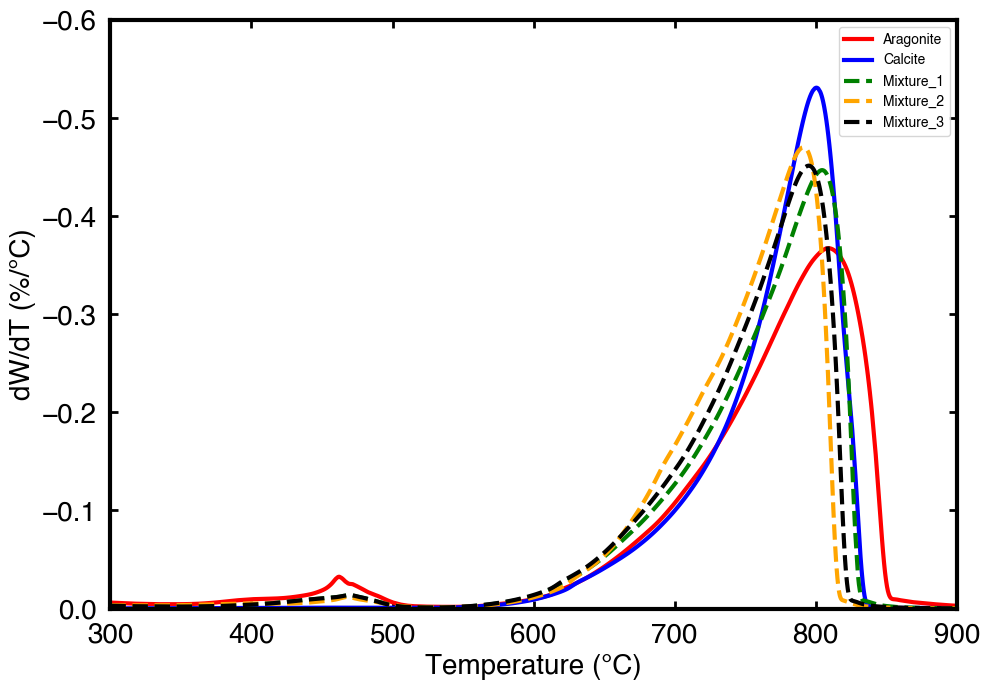

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
import matplotlib as mpl

# === Plot style settings ===
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['font.family'] = 'Helvetica'

# === Load Excel File ===
file_path_1 = 'TGA_ana_data/Aragonite_Lotus.xlsx'  
file_path_2 = 'TGA_ana_data/Calcite_Lotus.xlsx'
file_path_3 = 'TGA_ana_data/AC_1.xlsx'
file_path_4 = 'TGA_ana_data/AC_2.xlsx'
file_path_5 = 'TGA_ana_data/AC_3.xlsx'

# Load data from both sheets
df_1 = pd.read_excel(file_path_1, sheet_name='Sheet1') 
df_2 = pd.read_excel(file_path_2, sheet_name='Sheet1')
df_3 = pd.read_excel(file_path_3, sheet_name='Sheet1')
df_4 = pd.read_excel(file_path_4, sheet_name='Sheet1')
df_5 = pd.read_excel(file_path_5, sheet_name='Sheet1')

# Clean NaNs and Infs
df_1 = df_1.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_2 = df_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_3 = df_3.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_4 = df_4.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_5 = df_5.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])

# Group by Temperature and take mean
df_1 = df_1.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_2 = df_2.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_3 = df_3.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_4 = df_4.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_5 = df_5.groupby('Temperature', as_index=False).mean().sort_values('Temperature')

def second_derivative_5pt(f, dx):
    n = len(f)
    d2f = np.full(n, np.nan)
    for i in range(2, n - 2):
        d2f[i] = (-f[i - 2] + 16 * f[i - 1] - 30 * f[i] + 16 * f[i + 1] - f[i + 2]) / (12 * dx ** 2)
    return d2f
    

# === Function to calculate everything needed ===
def analyze_sample(temp, dw_dt, weight, label):
    # Smooth dW/dT
    dw_dt_smooth = savgol_filter(dw_dt, window_length=15, polyorder=3)
    #baseline = np.mean(dw_dt_smooth[temp < 500])
    #threshold = baseline - 0.05

    # Calculate second derivative
    second_derivative = np.gradient(dw_dt_smooth, temp)
    #def second_derivative_5pt(f, dx):
     #   n = len(f)
      #  d2f = np.full(n, np.nan)
       # for i in range(2, n - 2):
        #    d2f[i] = (-f[i - 2] + 16 * f[i - 1] - 30 * f[i] + 16 * f[i + 1] - f[i + 2]) / (12 * dx ** 2)
         #   return d2f
    
   # dx = np.mean(np.diff(temp))
    #second_derivative = second_derivative_5pt(dw_dt_smooth, dx)
    

    # Onset temperature
    range_mask_onset = (temp >= 500) & (temp <= 600)
    onset_candidates = np.where((second_derivative[range_mask_onset]) < -0.00001 )[0]
    onset_temp = temp[range_mask_onset][onset_candidates[0]] if len(onset_candidates) > 0 else None

    # End temperature
    range_mask_end = (temp >= 810) & (temp <= 900)
    end_candidates = np.where((np.abs(second_derivative[range_mask_end])) < 0.0001 )[0]
    end_temp = temp[range_mask_end][end_candidates[0]] if len(end_candidates) > 0 else None

    # Mass loss during decomposition (onset to end)
    mass_onset = np.interp(onset_temp, temp, weight) if onset_temp else None
    mass_end = np.interp(end_temp, temp, weight) if end_temp else None
    mass_loss_decomposition = mass_onset - mass_end if (mass_onset is not None and mass_end is not None) else None

    # Total mass loss from 110°C to final temp
    range_mask_total = (temp >= 110)
    mass_110 = np.interp(110, temp, weight)
    mass_final = weight[range_mask_total][-1]
    mass_loss_total = mass_110 - mass_final

    # Ratio
    ratio = mass_loss_decomposition / mass_loss_total if (mass_loss_decomposition is not None and mass_loss_total != 0) else None

    # === Print results ===
    print(f"\n=== RESULTS for {label} ===")
    print(f"Onset Temperature: {onset_temp:.2f} °C" if onset_temp else "Onset temperature not detected.")
    print(f"End Temperature: {end_temp:.2f} °C" if end_temp else "End temperature not detected.")
    print(f"Mass loss from onset to end: {mass_loss_decomposition:.2f} %" if mass_loss_decomposition else "Cannot calculate decomposition mass loss.")
    print(f"Total mass loss: {mass_loss_total:.2f} %" if mass_loss_total else "Cannot calculate total mass loss.")
    print(f"Ratio of decomposition mass loss to total mass loss: {ratio:.2f}" if ratio else "Cannot calculate ratio.")

    # === Return for plotting ===
    return dw_dt_smooth, onset_temp, end_temp


# === Analyze both "Before" and "After" ===
temp_1 = df_1['Temperature'].values
dw_dt_1 = df_1['DerivWeight'].values
weight_1 = df_1['Weight'].values

temp_2 = df_2['Temperature'].values
dw_dt_2 = df_2['DerivWeight'].values
weight_2 = df_2['Weight'].values

temp_3 = df_3['Temperature'].values
dw_dt_3 = df_3['DerivWeight'].values
weight_3 = df_3['Weight'].values

temp_4 = df_4['Temperature'].values
dw_dt_4 = df_4['DerivWeight'].values
weight_4 = df_4['Weight'].values

temp_5 = df_5['Temperature'].values
dw_dt_5 = df_5['DerivWeight'].values
weight_5 = df_5['Weight'].values

# Analyze samples and get smooth curves and onsets/ends
dw_dt_1_smooth, onset_temp_1, end_temp_1 = analyze_sample(temp_1, dw_dt_1, weight_1, 'Aragonite')
dw_dt_2_smooth, onset_temp_2, end_temp_2 = analyze_sample(temp_2, dw_dt_2, weight_2, 'Calcite')
dw_dt_3_smooth, onset_temp_3, end_temp_3 = analyze_sample(temp_3, dw_dt_3, weight_3, 'Mixutre_1')
dw_dt_4_smooth, onset_temp_4, end_temp_4 = analyze_sample(temp_4, dw_dt_4, weight_4, 'Mixture_2')
dw_dt_5_smooth, onset_temp_5, end_temp_5 = analyze_sample(temp_5, dw_dt_5, weight_5, 'Mixture_3')

# === Plotting both with onsets and ends ===
fig, ax = plt.subplots(figsize=(10, 7))

# Plot both curves
ax.plot(temp_1, dw_dt_1_smooth, color='red', linewidth=3, label='Aragonite')
ax.plot(temp_2, dw_dt_2_smooth, color='blue', linewidth=3, label='Calcite')
ax.plot(temp_3, dw_dt_3_smooth, color='green', linewidth=3, linestyle='--', label='Mixture_1')
ax.plot(temp_4, dw_dt_4_smooth, color='orange', linewidth=3, linestyle='--', label='Mixture_2')
ax.plot(temp_5, dw_dt_5_smooth, color='black', linewidth=3, linestyle='--', label='Mixture_3')

# Add onset and end markers
#if onset_temp_before:
#    ax.axvline(x=onset_temp_before, color='black', linestyle=':', linewidth=3, label=f'Onset Before: {onset_temp_before:.1f}°C')
#if end_temp_before:
#    ax.axvline(x=end_temp_before, color='gray', linestyle=':', linewidth=3, label=f'End Before: {end_temp_before:.1f}°C')

#if onset_temp_after:
#    ax.axvline(x=onset_temp_after, color='blue', linestyle=':', linewidth=3, label=f'Onset After: {onset_temp_after:.1f}°C')
#if end_temp_after:
#    ax.axvline(x=end_temp_after, color='cyan', linestyle=':', linewidth=3, label=f'End After: {end_temp_after:.1f}°C')

# Axis settings
ax.set_xlim([300, 900])
ax.set_ylim([-0.6, 0])
ax.invert_yaxis()

# Labels and legend
ax.set_xlabel(r'Temperature (°C)', fontsize=20)
ax.set_ylabel(r'dW/dT (%/°C)', fontsize=20)
ax.legend()
ax.tick_params(axis="y", labelsize=20, length=6, direction="in", width=2, pad=10)
ax.tick_params(axis="x", labelsize=20, length=6, direction="in", width=2, pad=10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
#ax.legend(fontsize=14, loc='best')

plt.tight_layout()
plt.show()


# Aragonite and Vaterite


=== RESULTS for Aragonite ===
Onset Temperature: 540.36 °C
End temperature not detected.
Cannot calculate decomposition mass loss.
Total mass loss: 45.34 %
Cannot calculate ratio.

=== RESULTS for Vaterite ===
Onset Temperature: 513.70 °C
End Temperature: 843.70 °C
Mass loss from onset to end: 41.72 %
Total mass loss: 44.12 %
Ratio of decomposition mass loss to total mass loss: 0.95

=== RESULTS for Mixutre_1 ===
Onset Temperature: 530.84 °C
End Temperature: 894.74 °C
Mass loss from onset to end: 42.57 %
Total mass loss: 45.07 %
Ratio of decomposition mass loss to total mass loss: 0.94

=== RESULTS for Mixture_2 ===
Onset Temperature: 529.94 °C
End Temperature: 885.39 °C
Mass loss from onset to end: 42.50 %
Total mass loss: 45.04 %
Ratio of decomposition mass loss to total mass loss: 0.94

=== RESULTS for Mixture_3 ===
Onset Temperature: 532.87 °C
End Temperature: 857.73 °C
Mass loss from onset to end: 42.60 %
Total mass loss: 45.36 %
Ratio of decomposition mass loss to total mass los

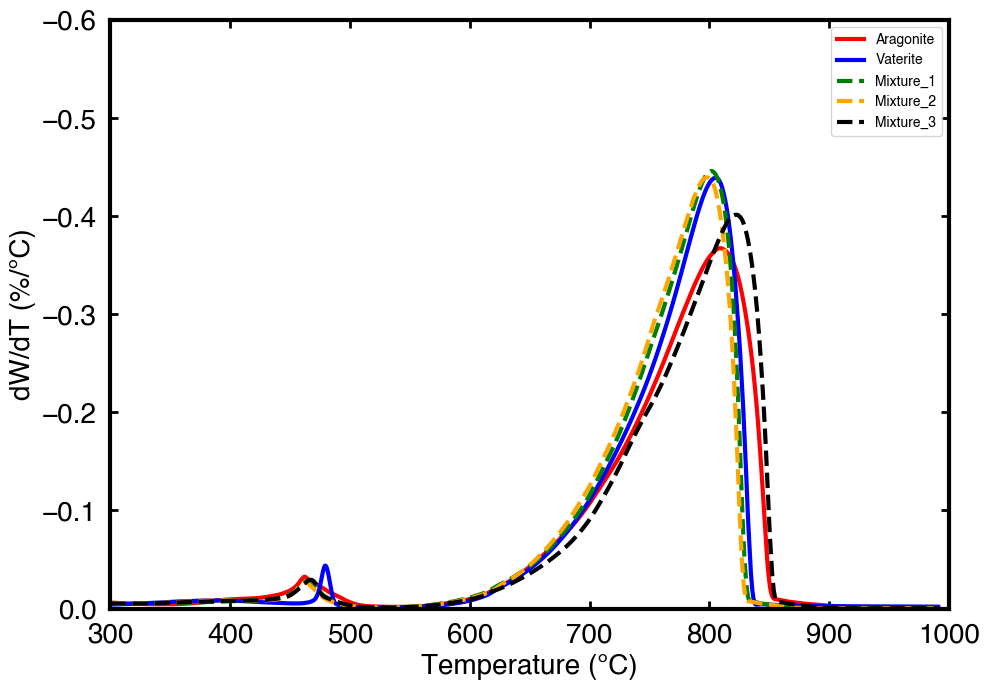

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
import matplotlib as mpl

# === Plot style settings ===
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['font.family'] = 'Helvetica'

# === Load Excel File ===
file_path_1 = 'TGA_ana_data/Aragonite_Lotus.xlsx'  
file_path_2 = 'TGA_ana_data/Vaterite_Lotus.xlsx'
file_path_3 = 'TGA_ana_data/AV_1.xlsx'
file_path_4 = 'TGA_ana_data/AV_2.xlsx'
file_path_5 = 'TGA_ana_data/AV_3.xlsx'

# Load data from both sheets
df_1 = pd.read_excel(file_path_1, sheet_name='Sheet1') 
df_2 = pd.read_excel(file_path_2, sheet_name='Sheet1')
df_3 = pd.read_excel(file_path_3, sheet_name='Sheet1')
df_4 = pd.read_excel(file_path_4, sheet_name='Sheet1')
df_5 = pd.read_excel(file_path_5, sheet_name='Sheet1')

# Clean NaNs and Infs in both 'Before' and 'After' datasets
df_1 = df_1.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_2 = df_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_3 = df_3.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_4 = df_4.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_5 = df_5.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])

# Group by Temperature and take mean
df_1 = df_1.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_2 = df_2.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_3 = df_3.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_4 = df_4.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_5 = df_5.groupby('Temperature', as_index=False).mean().sort_values('Temperature')


def second_derivative_5pt(f, dx):
    n = len(f)
    d2f = np.full(n, np.nan)
    for i in range(2, n - 2):
        d2f[i] = (-f[i - 2] + 16 * f[i - 1] - 30 * f[i] + 16 * f[i + 1] - f[i + 2]) / (12 * dx ** 2)
    return d2f
    

# === Function to calculate everything needed ===
def analyze_sample(temp, dw_dt, weight, label):
    
    # Smooth dW/dT
    dw_dt_smooth = savgol_filter(dw_dt, window_length=15, polyorder=3)

    # Calculate second derivative
    second_derivative = np.gradient(dw_dt_smooth, temp)
    #dx = np.mean(np.diff(temp))
    #second_derivative = second_derivative_5pt(dw_dt_smooth, dx)
    
    # Onset temperature
    range_mask_onset = (temp >= 490) & (temp <= 600)
    onset_candidates = np.where((second_derivative[range_mask_onset]) < -0.000001 )[0]
    onset_temp = temp[range_mask_onset][onset_candidates[0]] if len(onset_candidates) > 0 else None

    # End temperature
    range_mask_end = (temp >= 840) & (temp <= 910)
    end_candidates = np.where((np.abs(second_derivative[range_mask_end])) < 0.00001 )[0]
    end_temp = temp[range_mask_end][end_candidates[0]] if len(end_candidates) > 0 else None

    # Mass loss during decomposition (onset to end)
    mass_onset = np.interp(onset_temp, temp, weight) if onset_temp else None
    mass_end = np.interp(end_temp, temp, weight) if end_temp else None
    mass_loss_decomposition = mass_onset - mass_end if (mass_onset is not None and mass_end is not None) else None

    # Total mass loss from 110°C to final temp
    range_mask_total = (temp >= 110)
    mass_110 = np.interp(110, temp, weight)
    mass_final = weight[range_mask_total][-1]
    mass_loss_total = mass_110 - mass_final

    # Ratio
    ratio = mass_loss_decomposition / mass_loss_total if (mass_loss_decomposition is not None and mass_loss_total != 0) else None

    # === Print results ===
    print(f"\n=== RESULTS for {label} ===")
    print(f"Onset Temperature: {onset_temp:.2f} °C" if onset_temp else "Onset temperature not detected.")
    print(f"End Temperature: {end_temp:.2f} °C" if end_temp else "End temperature not detected.")
    print(f"Mass loss from onset to end: {mass_loss_decomposition:.2f} %" if mass_loss_decomposition else "Cannot calculate decomposition mass loss.")
    print(f"Total mass loss: {mass_loss_total:.2f} %" if mass_loss_total else "Cannot calculate total mass loss.")
    print(f"Ratio of decomposition mass loss to total mass loss: {ratio:.2f}" if ratio else "Cannot calculate ratio.")

    # === Return for plotting ===
    return dw_dt_smooth, onset_temp, end_temp


# === Analyze both "Before" and "After" ===
temp_1 = df_1['Temperature'].values
dw_dt_1 = df_1['DerivWeight'].values
weight_1 = df_1['Weight'].values

temp_2 = df_2['Temperature'].values
dw_dt_2 = df_2['DerivWeight'].values
weight_2 = df_2['Weight'].values

temp_3 = df_3['Temperature'].values
dw_dt_3 = df_3['DerivWeight'].values
weight_3 = df_3['Weight'].values

temp_4 = df_4['Temperature'].values
dw_dt_4 = df_4['DerivWeight'].values
weight_4 = df_4['Weight'].values

temp_5 = df_5['Temperature'].values
dw_dt_5 = df_5['DerivWeight'].values
weight_5 = df_5['Weight'].values

# Analyze samples and get smooth curves and onsets/ends
dw_dt_1_smooth, onset_temp_1, end_temp_1 = analyze_sample(temp_1, dw_dt_1, weight_1, 'Aragonite')
dw_dt_2_smooth, onset_temp_2, end_temp_2 = analyze_sample(temp_2, dw_dt_2, weight_2, 'Vaterite')
dw_dt_3_smooth, onset_temp_3, end_temp_3 = analyze_sample(temp_3, dw_dt_3, weight_3, 'Mixutre_1')
dw_dt_4_smooth, onset_temp_4, end_temp_4 = analyze_sample(temp_4, dw_dt_4, weight_4, 'Mixture_2')
dw_dt_5_smooth, onset_temp_5, end_temp_5 = analyze_sample(temp_5, dw_dt_5, weight_5, 'Mixture_3')

# === Plotting both with onsets and ends ===
fig, ax = plt.subplots(figsize=(10, 7))

# Plot both curves
ax.plot(temp_1, dw_dt_1_smooth, color='red', linewidth=3, label='Aragonite')
ax.plot(temp_2, dw_dt_2_smooth, color='blue', linewidth=3, label='Vaterite')
ax.plot(temp_3, dw_dt_3_smooth, color='green', linewidth=3, linestyle='--', label='Mixture_1')
ax.plot(temp_4, dw_dt_4_smooth, color='orange', linewidth=3, linestyle='--', label='Mixture_2')
ax.plot(temp_5, dw_dt_5_smooth, color='black', linewidth=3, linestyle='--', label='Mixture_3')

# Add onset and end markers
#if onset_temp_before:
#    ax.axvline(x=onset_temp_before, color='black', linestyle=':', linewidth=3, label=f'Onset Before: {onset_temp_before:.1f}°C')
#if end_temp_before:
#    ax.axvline(x=end_temp_before, color='gray', linestyle=':', linewidth=3, label=f'End Before: {end_temp_before:.1f}°C')

#if onset_temp_after:
#    ax.axvline(x=onset_temp_after, color='blue', linestyle=':', linewidth=3, label=f'Onset After: {onset_temp_after:.1f}°C')
#if end_temp_after:
#    ax.axvline(x=end_temp_after, color='cyan', linestyle=':', linewidth=3, label=f'End After: {end_temp_after:.1f}°C')

# Axis settings
ax.set_xlim([300, 1000])
ax.set_ylim([-0.6, 0])
ax.invert_yaxis()

# Labels and legend
ax.set_xlabel(r'Temperature (°C)', fontsize=20)
ax.set_ylabel(r'dW/dT (%/°C)', fontsize=20)
ax.legend()
ax.tick_params(axis="y", labelsize=20, length=6, direction="in", width=2, pad=10)
ax.tick_params(axis="x", labelsize=20, length=6, direction="in", width=2, pad=10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
#ax.legend(fontsize=14, loc='best')

plt.tight_layout()
plt.show()

# Vaterite and Calcite


=== RESULTS for Vaterite ===
Onset Temperature: 518.02 °C
End Temperature: 805.02 °C
Mass loss from onset to end: 32.39 %
Total mass loss: 44.12 %
Ratio of decomposition mass loss to total mass loss: 0.73

=== RESULTS for Calcite ===
Onset Temperature: 501.62 °C
End Temperature: 800.47 °C
Mass loss from onset to end: 17.80 %
Total mass loss: 23.92 %
Ratio of decomposition mass loss to total mass loss: 0.74

=== RESULTS for Mixutre_1 ===
Onset Temperature: 536.02 °C
End Temperature: 805.80 °C
Mass loss from onset to end: 32.32 %
Total mass loss: 44.11 %
Ratio of decomposition mass loss to total mass loss: 0.73

=== RESULTS for Mixture_2 ===
Onset Temperature: 541.23 °C
End Temperature: 817.50 °C
Mass loss from onset to end: 43.01 %
Total mass loss: 44.34 %
Ratio of decomposition mass loss to total mass loss: 0.97

=== RESULTS for Mixture_3 ===
Onset Temperature: 534.54 °C
End Temperature: 813.66 °C
Mass loss from onset to end: 42.95 %
Total mass loss: 44.31 %
Ratio of decomposition mas

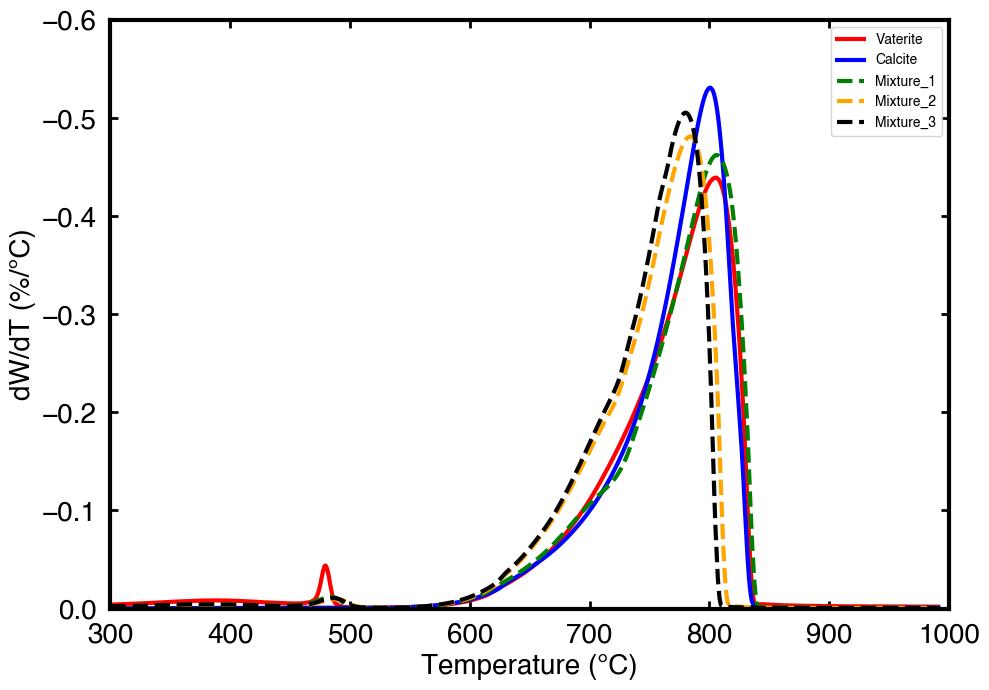

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
import matplotlib as mpl

# === Plot style settings ===
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['font.family'] = 'Helvetica'

# === Load Excel File ===
file_path_1 = 'TGA_ana_data/Vaterite_Lotus.xlsx'  
file_path_2 = 'TGA_ana_data/Calcite_Lotus.xlsx'
file_path_3 = 'TGA_ana_data/VC_1.xlsx'
file_path_4 = 'TGA_ana_data/VC_2.xlsx'
file_path_5 = 'TGA_ana_data/VC_3.xlsx'

# Load data from both sheets
df_1 = pd.read_excel(file_path_1, sheet_name='Sheet1') 
df_2 = pd.read_excel(file_path_2, sheet_name='Sheet1')
df_3 = pd.read_excel(file_path_3, sheet_name='Sheet1')
df_4 = pd.read_excel(file_path_4, sheet_name='Sheet1')
df_5 = pd.read_excel(file_path_5, sheet_name='Sheet1')

# Clean NaNs and Infs in both 'Before' and 'After' datasets
df_1 = df_1.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_2 = df_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_3 = df_3.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_4 = df_4.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])
df_5 = df_5.replace([np.inf, -np.inf], np.nan).dropna(subset=['Temperature', 'DerivWeight', 'Weight'])

# Group by Temperature and take mean
df_1 = df_1.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_2 = df_2.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_3 = df_3.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_4 = df_4.groupby('Temperature', as_index=False).mean().sort_values('Temperature')
df_5 = df_5.groupby('Temperature', as_index=False).mean().sort_values('Temperature')

def second_derivative_5pt(f, dx):
    n = len(f)
    d2f = np.full(n, np.nan)
    for i in range(2, n - 2):
        d2f[i] = (-f[i - 2] + 16 * f[i - 1] - 30 * f[i] + 16 * f[i + 1] - f[i + 2]) / (12 * dx ** 2)
    return d2f

# === Function to calculate everything needed ===
def analyze_sample(temp, dw_dt, weight, label):
    # Smooth dW/dT
    dw_dt_smooth = savgol_filter(dw_dt, window_length=15, polyorder=3)

    # Calculate second derivative
    second_derivative = np.gradient(dw_dt_smooth, temp)
    #dx = np.mean(np.diff(temp))
    #second_derivative = second_derivative_5pt(dw_dt_smooth, dx)
    
    # Onset temperature
    range_mask_onset = (temp >= 500) & (temp <= 600)
    onset_candidates = np.where((second_derivative[range_mask_onset]) < -0.00001 )[0]
    onset_temp = temp[range_mask_onset][onset_candidates[0]] if len(onset_candidates) > 0 else None

    # End temperature
    range_mask_end = (temp >= 800) & (temp <= 900)
    end_candidates = np.where((np.abs(second_derivative[range_mask_end])) < 0.0001 )[0]
    end_temp = temp[range_mask_end][end_candidates[0]] if len(end_candidates) > 0 else None

    # Mass loss during decomposition (onset to end)
    mass_onset = np.interp(onset_temp, temp, weight) if onset_temp else None
    mass_end = np.interp(end_temp, temp, weight) if end_temp else None
    mass_loss_decomposition = mass_onset - mass_end if (mass_onset is not None and mass_end is not None) else None

    # Total mass loss from 110°C to final temp
    range_mask_total = (temp >= 110)
    mass_110 = np.interp(110, temp, weight)
    mass_final = weight[range_mask_total][-1]
    mass_loss_total = mass_110 - mass_final

    # Ratio
    ratio = mass_loss_decomposition / mass_loss_total if (mass_loss_decomposition is not None and mass_loss_total != 0) else None

    # === Print results ===
    print(f"\n=== RESULTS for {label} ===")
    print(f"Onset Temperature: {onset_temp:.2f} °C" if onset_temp else "Onset temperature not detected.")
    print(f"End Temperature: {end_temp:.2f} °C" if end_temp else "End temperature not detected.")
    print(f"Mass loss from onset to end: {mass_loss_decomposition:.2f} %" if mass_loss_decomposition else "Cannot calculate decomposition mass loss.")
    print(f"Total mass loss: {mass_loss_total:.2f} %" if mass_loss_total else "Cannot calculate total mass loss.")
    print(f"Ratio of decomposition mass loss to total mass loss: {ratio:.2f}" if ratio else "Cannot calculate ratio.")

    # === Return for plotting ===
    return dw_dt_smooth, onset_temp, end_temp


# === Analyze both "Before" and "After" ===
temp_1 = df_1['Temperature'].values
dw_dt_1 = df_1['DerivWeight'].values
weight_1 = df_1['Weight'].values

temp_2 = df_2['Temperature'].values
dw_dt_2 = df_2['DerivWeight'].values
weight_2 = df_2['Weight'].values

temp_3 = df_3['Temperature'].values
dw_dt_3 = df_3['DerivWeight'].values
weight_3 = df_3['Weight'].values

temp_4 = df_4['Temperature'].values
dw_dt_4 = df_4['DerivWeight'].values
weight_4 = df_4['Weight'].values

temp_5 = df_5['Temperature'].values
dw_dt_5 = df_5['DerivWeight'].values
weight_5 = df_5['Weight'].values

# Analyze samples and get smooth curves and onsets/ends
dw_dt_1_smooth, onset_temp_1, end_temp_1 = analyze_sample(temp_1, dw_dt_1, weight_1, 'Vaterite')
dw_dt_2_smooth, onset_temp_2, end_temp_2 = analyze_sample(temp_2, dw_dt_2, weight_2, 'Calcite')
dw_dt_3_smooth, onset_temp_3, end_temp_3 = analyze_sample(temp_3, dw_dt_3, weight_3, 'Mixutre_1')
dw_dt_4_smooth, onset_temp_4, end_temp_4 = analyze_sample(temp_4, dw_dt_4, weight_4, 'Mixture_2')
dw_dt_5_smooth, onset_temp_5, end_temp_5 = analyze_sample(temp_5, dw_dt_5, weight_5, 'Mixture_3')

# === Plotting both with onsets and ends ===
fig, ax = plt.subplots(figsize=(10, 7))

# Plot both curves
ax.plot(temp_1, dw_dt_1_smooth, color='red', linewidth=3, label='Vaterite')
ax.plot(temp_2, dw_dt_2_smooth, color='blue', linewidth=3, label='Calcite')
ax.plot(temp_3, dw_dt_3_smooth, color='green', linewidth=3, linestyle='--', label='Mixture_1')
ax.plot(temp_4, dw_dt_4_smooth, color='orange', linewidth=3, linestyle='--', label='Mixture_2')
ax.plot(temp_5, dw_dt_5_smooth, color='black', linewidth=3, linestyle='--', label='Mixture_3')

# Add onset and end markers
#if onset_temp_before:
#    ax.axvline(x=onset_temp_before, color='black', linestyle=':', linewidth=3, label=f'Onset Before: {onset_temp_before:.1f}°C')
#if end_temp_before:
#    ax.axvline(x=end_temp_before, color='gray', linestyle=':', linewidth=3, label=f'End Before: {end_temp_before:.1f}°C')

#if onset_temp_after:
#    ax.axvline(x=onset_temp_after, color='blue', linestyle=':', linewidth=3, label=f'Onset After: {onset_temp_after:.1f}°C')
#if end_temp_after:
#    ax.axvline(x=end_temp_after, color='cyan', linestyle=':', linewidth=3, label=f'End After: {end_temp_after:.1f}°C')

# Axis settings
ax.set_xlim([300, 1000])
ax.set_ylim([-0.6, 0])
ax.invert_yaxis()

# Labels and legend
ax.set_xlabel(r'Temperature (°C)', fontsize=20)
ax.set_ylabel(r'dW/dT (%/°C)', fontsize=20)
ax.legend()
ax.tick_params(axis="y", labelsize=20, length=6, direction="in", width=2, pad=10)
ax.tick_params(axis="x", labelsize=20, length=6, direction="in", width=2, pad=10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
#ax.legend(fontsize=14, loc='best')

plt.tight_layout()
plt.show()